### Install jsonlines if you need it

import sys
!conda install --yes --prefix {sys.prefix} jsonlines

### Imports

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import jsonlines

## Read the simulation output

First as raw JSON lines

In [94]:
BASELINE = '../Data/history_file_baseline_2agents.json'
PROD_LOTTERY = '../Data/history_file_product_lottery_2agents.json'
STATIC = '../Data/history_file_static_lottery_2agents.json'
LEAST_FAIR = '../Data/history_file_least_fair_2agents.json'
MOST_COMPAT = '../Data/history_file_most_compatible_2agents.json'
FAIR_LOTTERY = '../Data/history_file_fairness_lottery_2agents.json'
FAIR_LOTTERY_100 = '../Data/history_file_fairness_lottery_100.json'

In [95]:
baseline = []
with jsonlines.open(BASELINE) as reader:
    for obj in reader:
        baseline.append(obj)
        
static = []
with jsonlines.open(STATIC) as reader:
    for obj in reader:
        static.append(obj)
        
product_lottery = []
with jsonlines.open(PROD_LOTTERY) as reader:
    for obj in reader:
        product_lottery.append(obj)
        
least_fair = []
with jsonlines.open(LEAST_FAIR) as reader:
    for obj in reader:
        least_fair.append(obj)
        
most_compat = []
with jsonlines.open(MOST_COMPAT) as reader:
    for obj in reader:
        most_compat.append(obj)
        
fair_lottery = []
with jsonlines.open(FAIR_LOTTERY) as reader:
    for obj in reader:
        fair_lottery.append(obj)
        
fair_lottery_100 = []
with jsonlines.open(FAIR_LOTTERY_100) as reader:
    for obj in reader:
        fair_lottery_100.append(obj)

Functions to process the history

In [144]:
def process_history(history, fair=True, compat=True, alloc=True, lists=True):
    if fair:
        fair_list = [entry['allocation']['fairness scores'] for entry in history]
        fair_df = pd.DataFrame(fair_list)
    else:
        fair_df = None
        
    if compat:
        compat_list = [entry['allocation']['compatibility scores'] for entry in history]
        compat_df = pd.DataFrame(compat_list)
    else:
        compat_df = None
        
    if alloc:
        alloc_list = [entry['allocation']['output'] for entry in history]
        alloc_df = pd.DataFrame(alloc_list)
        alloc_df['none'] = (alloc_df['Agent1'] == 0) & (alloc_df['Agent2'] == 0)
    else:
        alloc_df = None
        
    if lists:
        results_list = [process_results(entry['choice']['output']['results']) for entry in history]
    else:
        results_list = None
    
        
    return fair_df, compat_df, alloc_df, results_list

def process_results(result_structs):
    
    return [(entry['item'], entry['score']) for entry in result_structs]

        

Get the individual data frames and result lists

In [97]:
fair_df_base, compat_df_base, alloc_df_base, results = process_history(baseline)
fair_df_product_lottery, compat_df_product_lottery, alloc_df_product_lottery, results = process_history(product_lottery)
fair_df_static, compat_df_static, alloc_df_static, results_static = process_history(static)
fair_df_fair_lottery, compat_df_fair_lottery, alloc_df_fair_lottery, results_fair_lottery = process_history(fair_lottery)
fair_df_least_fair, compat_df_least_fair, alloc_df_least_fair, results_least_fair = process_history(least_fair)
fair_df_most_compat, compat_df_most_compat, alloc_df_most_compat, results_most_compat = process_history(most_compat)
fair_df_fair_100, compat_df_fair_100, alloc_df_fair_100, results_fair_100 = process_history(fair_lottery_100)



In [105]:
static_exp = process_history(static)
most_compat = process_history(most_compat)

In [99]:
fair_df =pd.DataFrame()

In [100]:

#Total sum per row: 
fair_df.loc[:,'Baseline'] = fair_df_base.sum(axis=1)
fair_df.loc[:,'Product_Lottry'] = fair_df_product_lottery.sum(axis=1)
fair_df.loc[:,'Static_Lottry'] = fair_df_static.sum(axis=1)
fair_df.loc[:,'Fair_Lottry'] = fair_df_fair_lottery.sum(axis=1)
fair_df.loc[:,'Least_Fair'] = fair_df_least_fair.sum(axis=1)
fair_df.loc[:,'Most_Compatible'] = fair_df_most_compat.sum(axis=1)

In [101]:
fair_df

,Baseline,Product_Lottry,Static_Lottry,Fair_Lottry,Least_Fair,Most_Compatible
0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
1,0.533333,1.000000,1.000000,1.000000,0.533333,1.000000
2,0.900000,1.666667,1.666667,1.666667,0.933333,1.000000
3,0.933333,1.555556,1.555556,1.555556,1.288889,1.000000
4,0.816667,1.500000,1.500000,1.500000,1.300000,1.000000
...,...,...,...,...,...,...
995,0.860000,1.000000,1.506667,1.606667,1.606667,0.860000
996,0.873333,1.000000,1.373333,1.653333,1.606667,0.873333
997,0.846667,1.000000,1.506667,1.606667,1.606667,0.846667
998,0.853333,1.000000,1.480000,1.606667,1.540000,0.853333


In [102]:
compat_df

NameError: name 'compat_df' is not defined

In [ ]:
alloc_df

In [ ]:
results[0]

## Visualizations

Simple plot of the fairness values computed at each iteration

In [169]:
def plot_fairness_time(experiment_data, include_none=False, image_prefix=None):

    fair_df = experiment_data[0]
    fig, ax = plt.subplots(figsize=(10, 6))
    sb.set(font_scale=2)
    plt.xlabel("Time")
    plt.ylabel("Fairness")
    sb.lineplot(data=fair_df)
    image_file = image_prefix + '-fairness.png'
    plt.savefig(image_file)
                

In [170]:
def plot_allocation(experiment_data, include_none=False, image_prefix=None):
    alloc_df = pd.DataFrame(experiment_data[2])
    if include_none is False:
        alloc_df = alloc_df.dropna(axis=1,how='all')
    fig, ax = plt.subplots(figsize=(10, 6))
    sb.set(font_scale=2)
    plt.xlabel("Time")
    plt.ylabel("Allocation")
    sb.lineplot(data=alloc_df.cumsum())
    image_file = image_prefix + '-allocation.png'
    plt.savefig(image_file)

In [171]:
def plot_fairness_regret(experiment_data, include_none=False, image_prefix=None):

    fair_df = experiment_data[0]
    regret = 1-fair_df
    fig, ax = plt.subplots(figsize=(10, 6))
    sb.set(font_scale=2)
    plt.xlabel("Time")
    plt.ylabel("Regret")
    sb.lineplot(data=regret.cumsum())
    image_file = image_prefix + '-regret.png'
    plt.savefig(image_file)

In [148]:
def do_plots(experiment_data, include_none=False, image_prefix=None):
    plot_fairness_time(experiment_data, include_none=False, image_prefix=None)
    plot_allocation(experiment_data, include_none=False, image_prefix=None)
    plot_fairness_regret(experiment_data, include_none=False, image_prefix=None)
    

In [146]:
def process(experiment, include_none=False, image_prefix=None):
    experiment_data = process_history(experiment)
    
    do_plots(experiment_data, include_none=False, image_prefix=None)

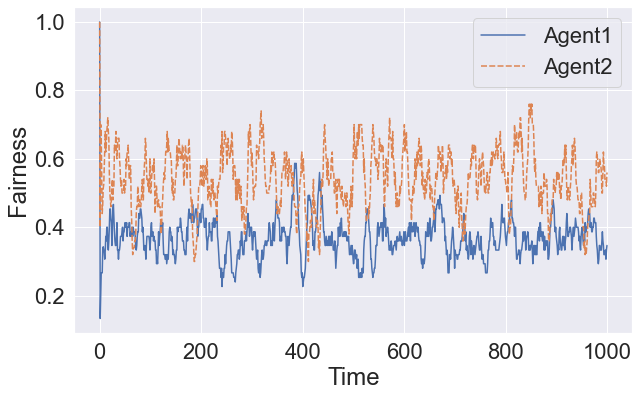

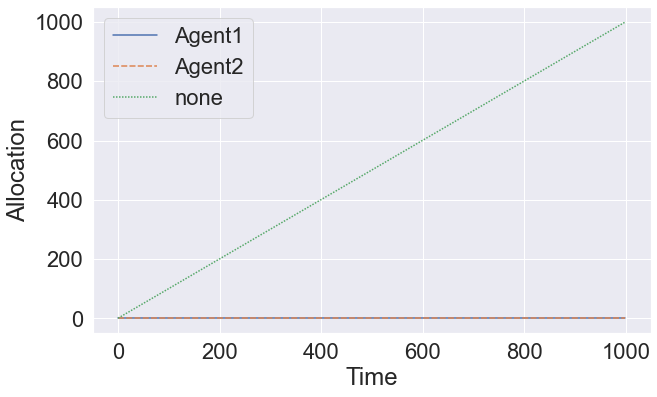

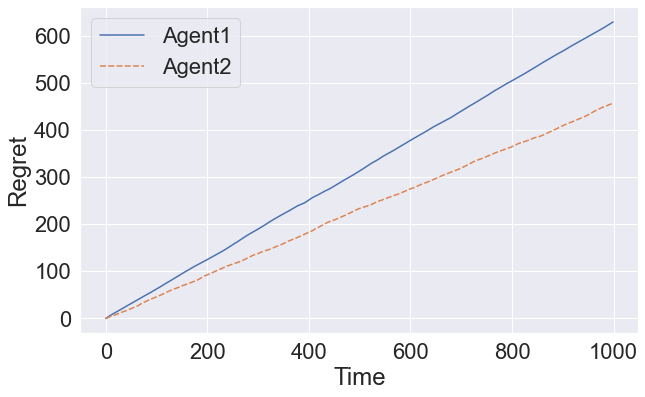

In [191]:
process(baseline, image_prefix='base')

In [162]:
alloc_df_least_fair

,Agent1,Agent2,none
0,0.0,0.0,True
1,1.0,0.0,False
2,0.0,1.0,False
3,1.0,0.0,False
4,0.0,1.0,False
...,...,...,...
995,1.0,0.0,False
996,1.0,0.0,False
997,1.0,0.0,False
998,0.0,1.0,False


In [161]:
alloc_df_least_fair['none'] = (alloc_df_least_fair['Agent1'] == 0) & (alloc_df_least_fair['Agent2'] == 0)

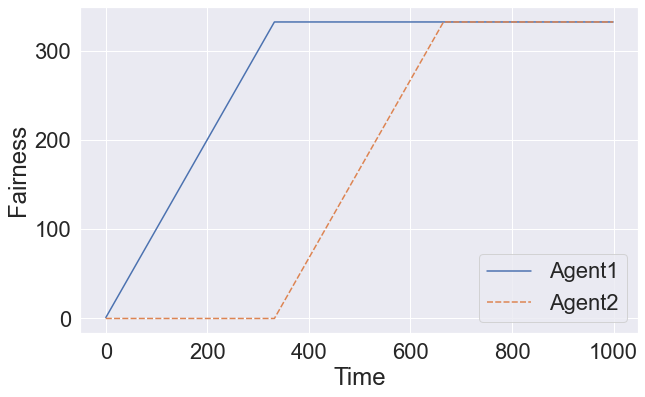

In [111]:
plot_allocation_time(most_compat)

ValueError: Could not interpret input 'Agent'

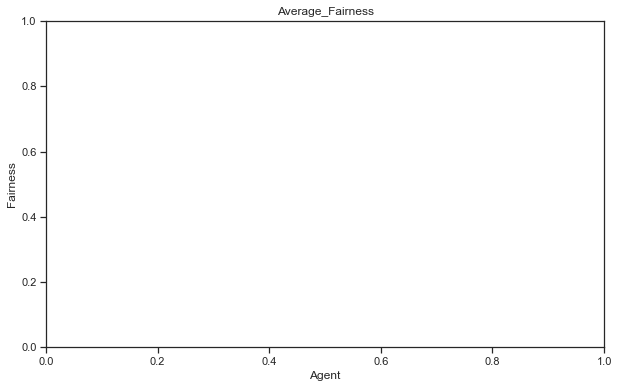

In [25]:
# Set up the plot
sb.set(style="ticks")
fig, ax = plt.subplots(figsize=(10, 6))
# Add title and axis labels
ax.set_title("Average_Fairness")
ax.set_xlabel("agent")
ax.set_ylabel("Fairness")
# Draw the boxplot
sb.boxplot(x="agent", y="Fairness", hue="variable", data=fair_df_static, ax=ax)
# Remove unnecessary elements
sb.despine(trim=True, left=True)
# Adjust the aspect ratio
plt.tight_layout()

NameError: name 'fair_df_alloc' is not defined

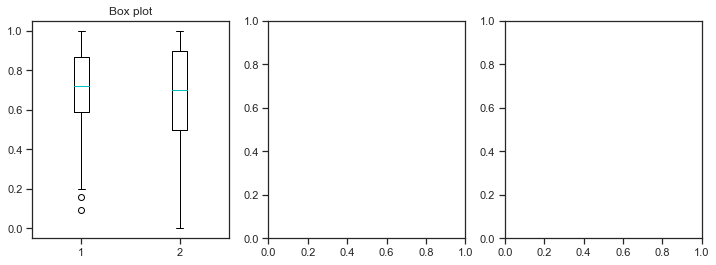

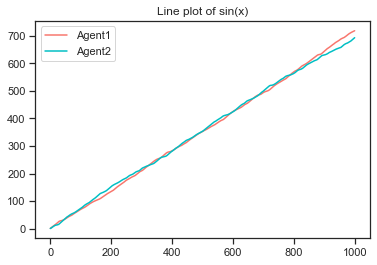

In [ ]:
fair_

<AxesSubplot:>

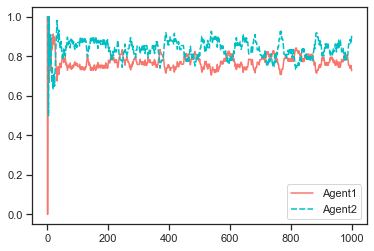

In [72]:
sb.lineplot(data=fair_df_fair_100)

<AxesSubplot:>

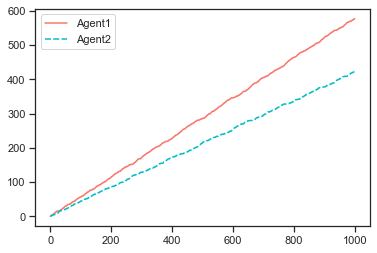

In [73]:
sb.lineplot(data=alloc_df_fair_100.cumsum())

In [59]:
alloc_df_most_compat['none'] = (alloc_df_most_compat['Agent1'] == 0) & (alloc_df_most_compat['Agent2'] == 0)

<AxesSubplot:xlabel='index', ylabel='variable'>

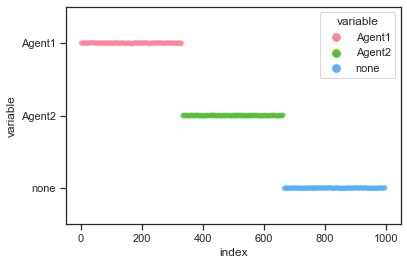

In [61]:
alloc_df_melt = alloc_df_most_compat.reset_index().melt(id_vars=['index'])
alloc_df_melt1 = alloc_df_melt[alloc_df_melt['value']==1]
sb.stripplot(data=alloc_df_melt1, x='index', y='variable', hue='variable', alpha=0.25, jitter=0.01)

<AxesSubplot:>

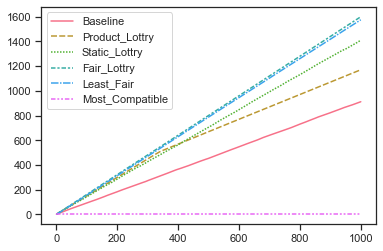

In [33]:
#All algorithms
sb.lineplot(data=fair_df.cumsum())

In [35]:
fair_melt = pd.melt(fair_df)

<AxesSubplot:>

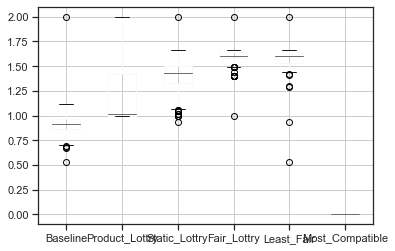

In [77]:
#All algorithms

fair_df.boxplot()

<AxesSubplot:xlabel='value', ylabel='variable'>

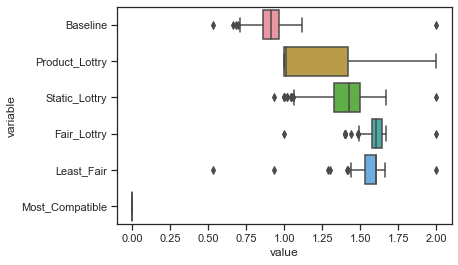

In [85]:
#air_df_melt = fair_df_static.reset_index().melt(id_vars=['index'])
sb.boxplot(data=fair_df_melt, x='value', y='variable', orient='h')

In [82]:
fair_df_melt = fair_df.reset_index().melt(id_vars=['index'])
fair_df_melt

,index,variable,value
0,0,Baseline,2.000000
1,1,Baseline,0.533333
2,2,Baseline,0.900000
3,3,Baseline,0.933333
4,4,Baseline,0.816667
...,...,...,...
5995,995,Most_Compatible,0.000000
5996,996,Most_Compatible,0.000000
5997,997,Most_Compatible,0.000000
5998,998,Most_Compatible,0.000000


Same for allocation

In [ ]:
alloc_df_melt = alloc_df.reset_index().melt(id_vars=['index'])
sb.stripplot(data=alloc_df_melt, x='index', y='value', hue='variable', dodge=True)

<AxesSubplot:>

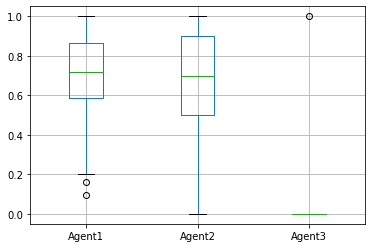

In [35]:
fair_df.boxplot()

ValueError: Could not interpret input 'index'

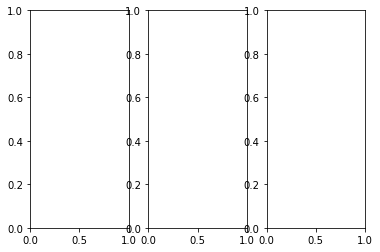

In [30]:
# Store the list of columns
columns_to_plot = ['Agent1','Agent2','Agent3']

# Create the figure and two subplots
fig, axes = plt.subplots(ncols=len(columns_to_plot))

# Create the boxplot with Seaborn
for column, axis in zip(columns_to_plot, axes):
        sb.boxplot(data=fair_df[column], x='index', y='value', hue = 'variable', ax = axis) 
        axis.set_title(column)


# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
sb.stripplot(data=fair_df_melt, x='index', y='value', hue='variable', dodge=True)

In [19]:
sb.stripplot(data=alloc_df_melt, x='index', y='value', hue='variable', dodge=True)

NameError: name 'alloc_df_melt' is not defined

In [ ]:
sb.boxplot(data=alloc_df_melt, x='index', y='value', hue='variable')